In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

level = 2

def plot(img1, img2):
    
    fig = plt.figure(figsize = (20,10))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Original Image")

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Filtered Image")

    plt.show()


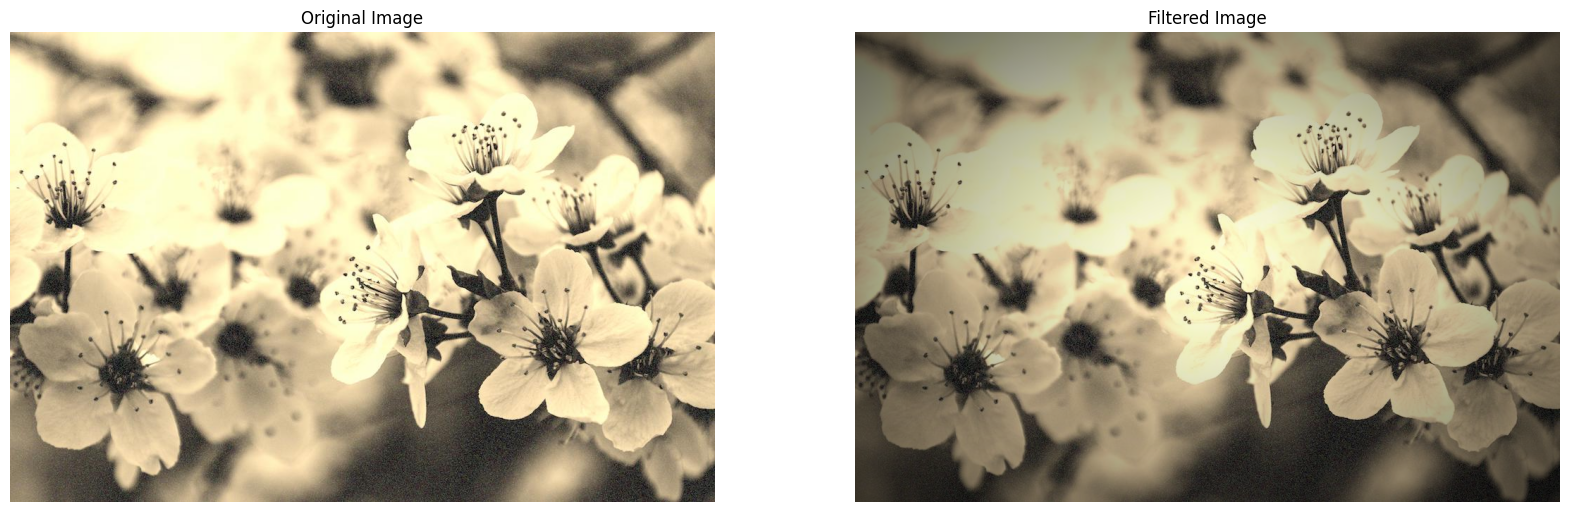

In [2]:
img = cv2.imread("filter_sepia.jpg")
height, width = img.shape[:2]  

# Generate vignette mask using Gaussian kernels.
X_resultant_kernel = cv2.getGaussianKernel(width, width/level)
Y_resultant_kernel = cv2.getGaussianKernel(height, height/level)
    
# Generating resultant_kernel matrix.
# H x 1 * 1 x W
kernel = Y_resultant_kernel * X_resultant_kernel.T
mask = kernel / kernel.max()

img_vignette = np.copy(img)

for i in range(3):
    img_vignette[:, :, i] = img[:, :, i] * mask

plot(img, img_vignette)

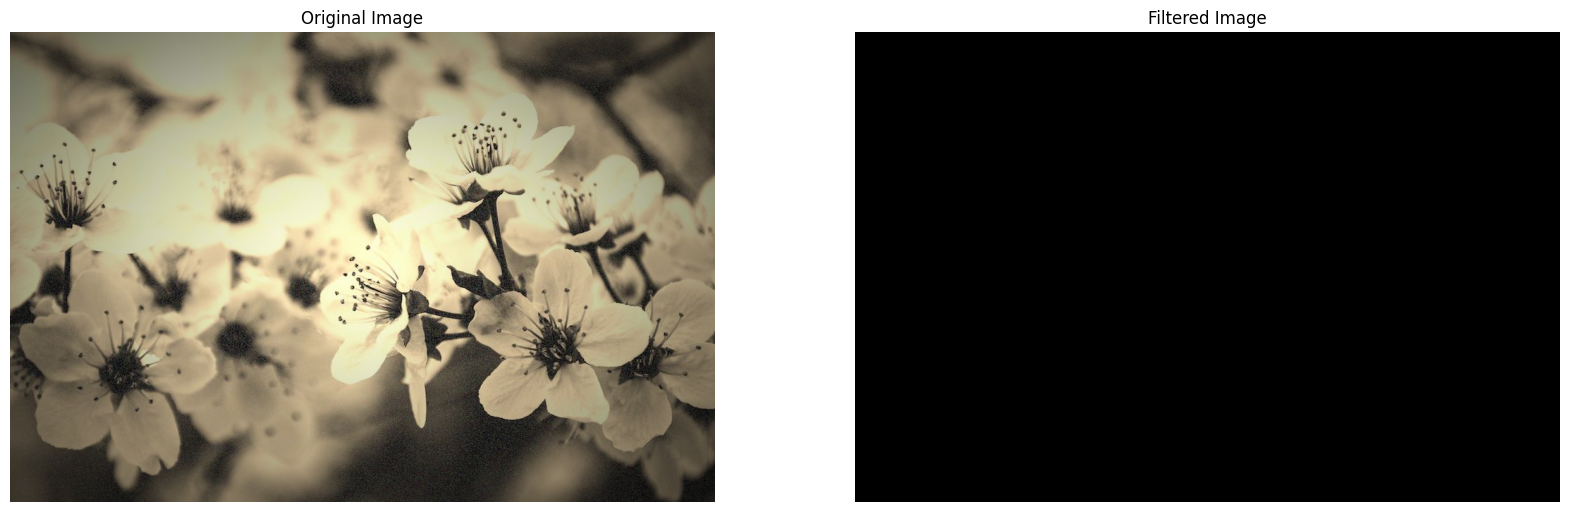

In [3]:
mask2 = kernel / np.linalg.norm(kernel)
img_v = np.copy(img)
for i in range(3):
    img_v[:, :, i] = img[:, :, i] * mask2
plot(img_vignette, img_v)

In [4]:
img = cv2.imread("IMG_9187.jpg")
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = np.array([160,100,50])
upper_red = np.array([180,255,255])

mask = cv2.inRange(hsv, lower_red, upper_red)
mask_inv = cv2.bitwise_not(mask)
res = cv2.bitwise_and(img, img, mask=mask)
background = cv2.bitwise_and(grayImg, grayImg, mask = mask_inv)
background = np.stack((background,)*3, axis=-1)
added_img = cv2.add(res, background)
cv2.namedWindow("added", cv2.WINDOW_NORMAL)
cv2.imshow("added",added_img)
if cv2.waitKey(0):
    cv2.destroyAllWindows()

In [5]:
def sketch(image):
    #convert image to grayscale
    img_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    #cleaning up the image using Gaussian blur
    img_gray_blur=cv2.GaussianBlur(img_gray,(5,5),0)

    #extract edges

    canny_edges=cv2.Canny(img_gray_blur,10,70)

    #do an invert binarize the image
    ret, mask=cv2.threshold(canny_edges,70,255,cv2.THRESH_BINARY_INV)
    return mask

#initialize webcam, cap is the object provided by video capture
#it contains a Boolean indicating if it was successful(ret)
#it also contains the images collected from the webcam(frame)

cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    cv2.imshow('livesketcher',sketch(frame))
    if cv2.waitKey(1) == 13:    #13 is the enterkey
        break

#release camera and close window, remember to release the webcam with the help of cap.release()
cap.release()
cv2.destroyAllWindows()

In [6]:
def sketch(image):
    #convert image to grayscale
    img_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    #cleaning up the image using Gaussian blur
    img_gray_blur=cv2.GaussianBlur(img_gray,(5,5),0)

    #extract edges

    canny_edges=cv2.Canny(img_gray_blur,10,70)

    #do an invert binarize the image
    ret, mask=cv2.threshold(canny_edges,70,255,cv2.THRESH_BINARY_INV)
    result = cv2.bitwise_or(image, mask)
    return result
cv2.namedWindow("added", cv2.WINDOW_NORMAL)
a = cv2.imread("megumi_1.png")
# cv2.imshow("a",sketch(a))
if cv2.waitKey(1) == 13:    #13 is the enterkey
    cv2.destroyAllWindows()

In [ ]:
def sketch(img):
    #convert image to grayscale
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #cleaning up the image using Gaussian blur
    img_gray_blur=cv2.GaussianBlur(img_gray,(5,5),0)

    #extract edges

    canny_edges=cv2.Canny(img_gray_blur,10,70)

    #do an invert binarize the image
    ret, mask=cv2.threshold(canny_edges,70,255,cv2.THRESH_BINARY_INV)
    fg = cv2.bitwise_or(img, img, mask=mask)
    mask = cv2.bitwise_not(mask)
    background = np.full(img.shape, 255, dtype=np.uint8)
    bk = cv2.bitwise_or(background, background, mask=mask)
    result = cv2.bitwise_or(fg, bk)
    return result
cv2.namedWindow("added", cv2.WINDOW_NORMAL)
a = cv2.imread("megumi_1.png")
cv2.imshow("added",sketch(a))
if cv2.waitKey(1) == 13:    #13 is the enterkey
    cv2.destroyAllWindows()

: 